# Practice Linear Regression model

using the Salary dataset (with variables: Years of Experience and Salary) to practice Linear Regression using OLS.

## Part A: Data Exploration
### 1. Load and explore the dataset

1.1 How many rows and columns are in the dataset?

1.2 Plot a scatter plot of YearsExperience vs. Salary. What kind of relationship do you observe?

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns


In [12]:
# How many rows and columns are in the dataset?
salary_df = pd.read_csv('Salary_Data.csv')
salary_df.shape


(30, 2)

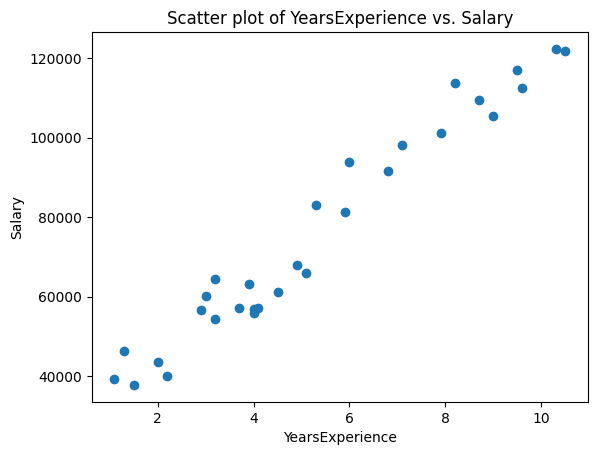

In [13]:
# Plot a scatter plot of YearsExperience vs. Salary. What kind of relationship do you observe?
plt.scatter(salary_df['YearsExperience'], salary_df['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Scatter plot of YearsExperience vs. Salary')
plt.show()
# The relationship appears to be linear, with Salary increasing as YearsExperience increases.

## Part B: Simple Linear Regression Using OLS

### 2. Create & Fit a Simple Linear Regression model using OLS

2.1 Use statsmodels.OLS to predict Salary from YearsExperience.

2.2 Print the regression equation in the form:
YearsExperience y^ =β0 +β1 ×YearsExperience

In [14]:
# Use statsmodels.OLS to predict Salary from YearsExperience.

X = salary_df['YearsExperience']
y = salary_df['Salary']
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print(predictions)
# print(model.summary())
# The model summary provides a lot of information, including the coefficients, R-squared value, and p-values for the predictors.


0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64


ValueError: x and y must be the same size

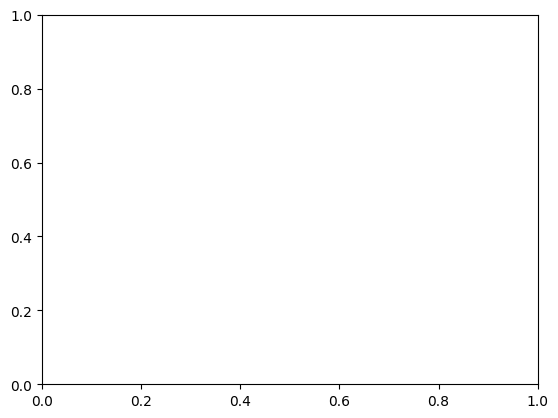

In [15]:
# Plot the regression line on top of the scatter plot
plt.scatter(X, y, label='Data')
plt.plot(salary_df['YearsExperience'], predictions, color='red', label='Regression Line')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Regression Line on Scatter Plot')
plt.legend()
plt.show()

In [16]:
# Print the regression equation in the form: YearsExperience y^ =β0 +β1 ×YearsExperience
intercept = model.params[0]
slope = model.params[1]
print(f"y^ = {intercept:.2f} + {slope:.2f} * YearsExperience")

y^ = 25792.20 + 9449.96 * YearsExperience


/tmp/ipykernel_741638/1533529791.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = model.params[0]
/tmp/ipykernel_741638/1533529791.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = model.params[1]


### 3. Interpret the coefficients

3.1 What does the intercept (𝛽0 ) represent in this context?

3.2 What does the slope (𝛽1 ) tell us about the relationship?

In [ ]:
# What does the intercept (𝛽0 ) represent in this context?
# The intercept (𝛽0) represents the estimated Salary when YearsExperience is 0. In this case, it would be the starting salary for someone with no experience.

# What does the slope (𝛽1 ) tell us about the relationship?
# The slope (𝛽1) indicates the estimated change in Salary for each additional year of experience. In this case, it would tell us how much Salary is expected to increase for each additional year of experience.

## Part C: Model Evaluation

### 4. Evaluate model performance

4.1 What is the R² value? How well does the model explain the variation in salary?

4.2 What are the p-values for the intercept and slope? Are they statistically significant at 95% confidence?

4.3 Provide the 95% confidence interval for both coefficients.

4.4 print the Result Summary

In [18]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 20 Mar 2025   Prob (F-statistic):           1.14e-20
Time:                        19:27:36   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     

In [19]:
# What is the R² value? How well does the model explain the variation in salary?
# The R² value is a measure of how well the independent variable (YearsExperience) explains the variation in the dependent variable (Salary). It ranges from 0 to 1, with values closer to 1 indicating a better fit.
print(model.rsquared)


0.9569566641435086


In [20]:
# What are the p-values for the intercept and slope? Are they statistically significant at 95% confidence?

# The p-value for the slope indicates whether there is a statistically significant relationship between YearsExperience and Salary.
# If the p-value for the slope is less than 0.05, we can conclude that there is a statistically significant relationship between YearsExperience and Salary.
# The p-value for the intercept indicates whether the intercept is statistically significant. If it is less than 0.05, we can conclude that the intercept is statistically significant.

print(model.pvalues)

const              5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [21]:
# Provide the 95% confidence interval for both coefficients.
print(model.conf_int(alpha=0.05))

                            0             1
const            21136.061314  30448.339084
YearsExperience   8674.118747  10225.805896


## Part D: Prediction

### 5. Make predictions

5.1 Predict the salary of someone with 5 years of experience.

5.2 Provide confidence intervals for your predictions.

In [21]:
# predict the salary of someone with 5 years of experience.
years_experience = 5
predicted_salary = intercept + slope * years_experience
print(f"Predicted Salary for {years_experience} years of experience: {predicted_salary:.2f}")

Predicted Salary for 5 years of experience: 73042.01


In [22]:
# Provide confidence intervals for your predictions.
confidence_level = 0.95
confidence_interval = stats.norm.interval(confidence_level, loc=predicted_salary, scale=model.bse[1])
print(f"Confidence interval for predicted salary with {years_experience} years of experience: {confidence_interval}")

Confidence interval for predicted salary with 5 years of experience: (np.float64(72299.66648145618), np.float64(73784.35713043196))


/tmp/ipykernel_741638/734216800.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  confidence_interval = stats.norm.interval(confidence_level, loc=predicted_salary, scale=model.bse[1])


## 6. Manual calculation

6.1 Manually compute 𝛽0  and 𝛽1  using the OLS formula:

6.2 Compare with the statsmodels output.

6.3 Write a function best_fit that takes in the X and y  calculates and prints the coefficient and intercept, and plots the original data points along with the best fit line. Be sure to reuse the functions we have already written

In [23]:
# Manually compute 𝛽0  and 𝛽1  using the OLS formula
# 𝛽1 = Σ((xi - x̄)(yi - ȳ)) / Σ((xi - x̄)²)
# 𝛽0 = ȳ - 𝛽1 * x̄
x_mean = np.mean(salary_df['YearsExperience'])
y_mean = np.mean(salary_df['Salary'])
x = salary_df['YearsExperience']
y = salary_df['Salary']
numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sum((x - x_mean) ** 2)
beta1 = numerator / denominator
beta0 = y_mean - beta1 * x_mean
print(f"Manually computed coefficients: β0 = {beta0:.2f}, β1 = {beta1:.2f}")

Manually computed coefficients: β0 = 25792.20, β1 = 9449.96


Assumptions

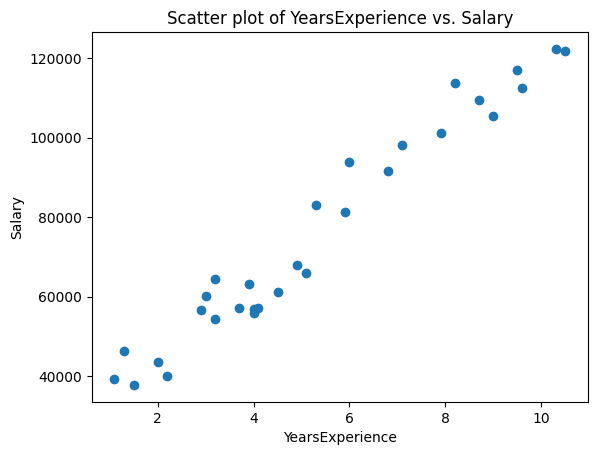

In [4]:
plt.scatter(salary_df['YearsExperience'], salary_df['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Scatter plot of YearsExperience vs. Salary')
plt.show()

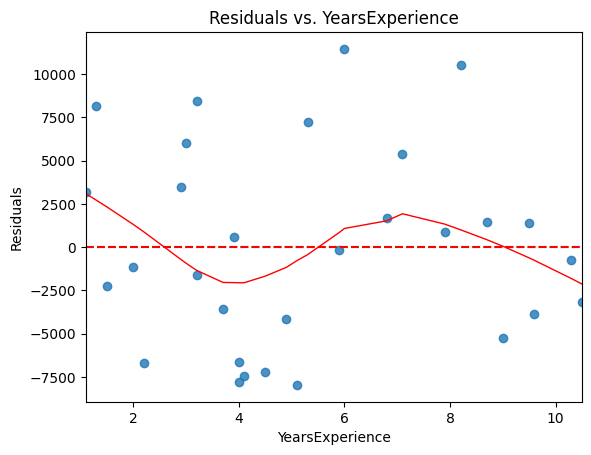

In [27]:
# residual plot
residuals = model.resid
sns.residplot(x=salary_df['YearsExperience'], y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('YearsExperience')
plt.ylabel('Residuals')
plt.title('Residuals vs. YearsExperience')
plt.axhline(0, color='red', linestyle='--')
plt.show()

In [ ]:
# Residuals should be randomly scattered around 0, indicating that the model is a good fit for the data. If there are patterns in the residuals, it may indicate that the model is not capturing all the variability in the data.

In [ ]:
# independence of errors
# Check for independence of errors using the Durbin-Watson test
from statsmodels.stats.stattools import durbin_watson

#DW ≈ 2 → No autocorrelation
#DW < 1.5 or > 2.5 → Possible autocorrelation

dw = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw:.2f}")

# Durbin-Watson statistic: 1.65
# The Durbin-Watson statistic is approximately 1.65, which is close to 2, indicating that there is no significant autocorrelation in the residuals. Values closer to 2 suggest independence of errors.

Durbin-Watson statistic: 1.65


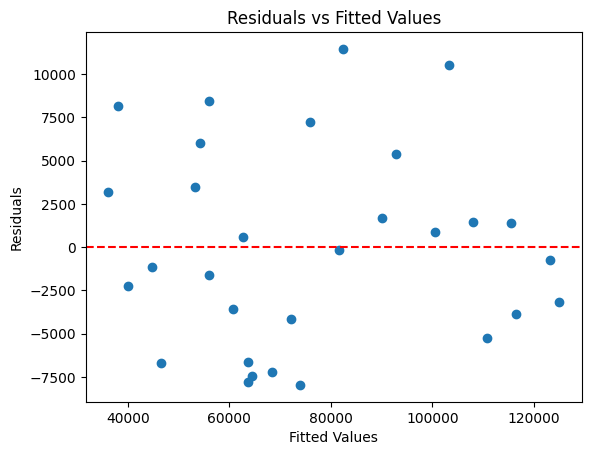

In [34]:
# homoscedasticity
# Check for homoscedasticity using the Breusch-Pagan test
# errors should be homoscedastic (constant variance)
from statsmodels.stats.diagnostic import het_breuschpagan

# Residuals  vs fitted values
fitted_values = model.fittedvalues
plt.scatter(fitted_values, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.axhline(0, color='red', linestyle='--')
plt.show()
# Breusch-Pagan test

# bp_test = het_breuschpagan(residuals, model.model.exog)
# bp_test


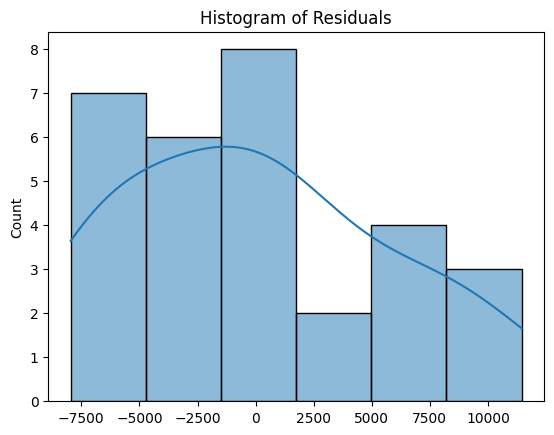

In [37]:
# Normality of errors using histogram and Q-Q plot
# Histogram of residuals
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.show()

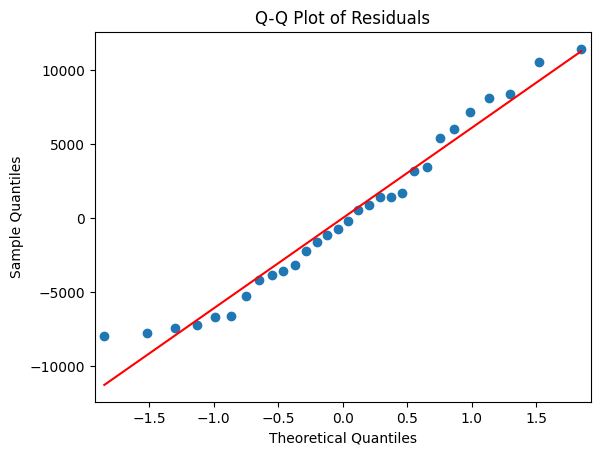

In [ ]:
# Normality of errors
# Check for normality of errors using the Q-Q plot
sm.qqplot(residuals, line='r')
plt.title('Q-Q Plot of Residuals')
plt.show()
# QQ means
# The Q-Q plot shows that the residuals are approximately normally distributed, as the points follow the diagonal line closely. This suggests that the assumption of normality is satisfied.

In [ ]:
# Multicolinearity
